In [3]:
import sys
sys.path.append('../src/training-on-CM2.6')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
import cmocean

from helpers.cm26 import DatasetCM26, read_datasets
from helpers.selectors import *
from helpers.plot_helpers import *

%load_ext autoreload
%autoreload 3

## Read from the disk ANN skill on testing dataset

In [4]:
def read_skill(exp='subfilter/FGR3/EXP1', factors=[4,9,12,15], base_path='/scratch/pp2681/mom6/CM26_ML_models/ocean3d/'):
    ds = {}
    for factor in factors:
        data = xr.open_dataset(f'{base_path}/{exp}/skill-test/factor-{factor}.nc', chunks={'zl':1})
        data['zl'] = -data['zl']
        ds[factor] = data
        
    return ds

In [5]:
# Default ANN tested in online simulations
ann_default = read_skill('subfilter/FGR3/EXP1')

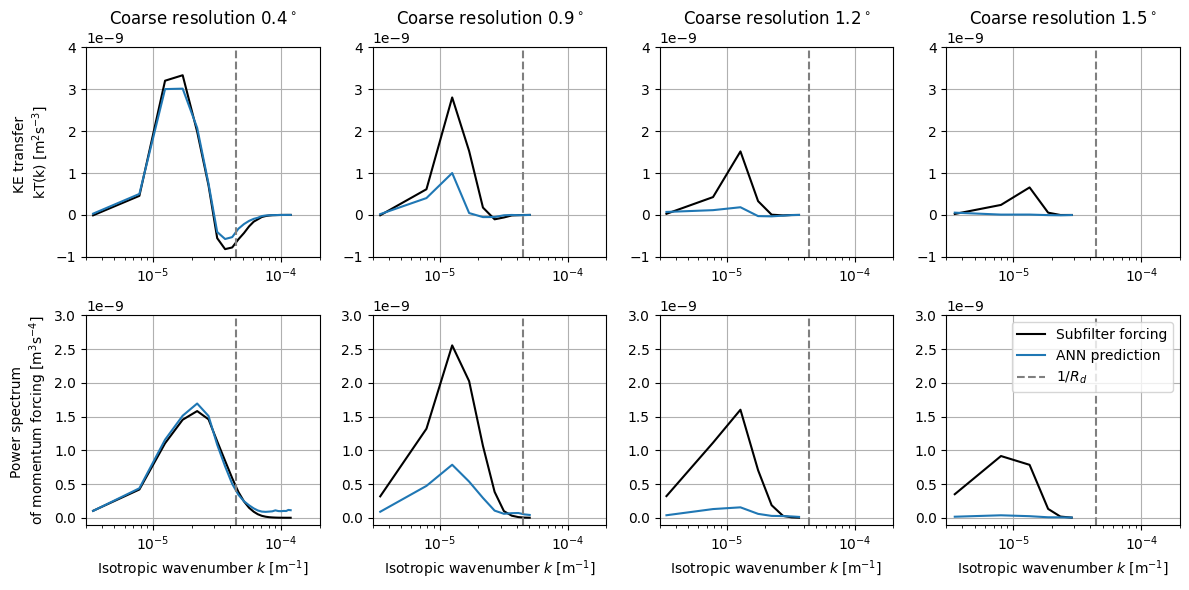

In [6]:
plt.figure(figsize=(12,6))

for column, factor, resolution in zip([0,1,2,3],[4,9,12,15],['$0.4^\circ$', '$0.9^\circ$', '$1.2^\circ$', '$1.5^\circ$']):
    plt.subplot(2,4,column+1)
    ann_default[factor].transfer_NA.mean('time').isel(zl=0).plot(color='k', label='Subfilter forcing')
    ann_default[factor].transfer_ZB_NA.mean('time').isel(zl=0).plot(label='ANN prediction')
    plt.xscale('log')
    plt.title(f'Coarse resolution {resolution}')
    plt.tight_layout()
    plt.xlabel('')
    if column==0:
        plt.ylabel('KE transfer \nkT(k) [m$^2$s$^{-3}$]')
    else:
        plt.ylabel('')
    plt.xlim([3e-6, 2e-4])
    plt.ylim([-1e-9, 4e-9])
    plt.grid()
    plt.axvline(x=1/(22.6e+3), color='tab:gray', ls='--')

    plt.subplot(2,4,column+5)
    ann_default[factor].power_NA.mean('time').isel(zl=0).plot(color='k', label='Subfilter forcing')
    ann_default[factor].power_ZB_NA.mean('time').isel(zl=0).plot(label='ANN prediction')
    plt.xscale('log')
    plt.title('')
    plt.tight_layout()
    plt.xlabel('Isotropic wavenumber $k$ [$\mathrm{m}^{-1}$]')
    if column==0:
        plt.ylabel('Power spectrum \nof momentum forcing [m$^3$s$^{-4}$]')
    else:
        plt.ylabel('')
    plt.xlim([3e-6, 2e-4])
    plt.ylim([-0.1e-9, 3e-9])
    plt.grid()
    plt.axvline(x=1/(22.6e+3), color='tab:gray', ls='--')

plt.plot(np.nan, np.nan, color='tab:gray', ls='--', label='$1/R_d$')
plt.legend()
plt.savefig('figures/power-transfer.pdf')